In [1]:
!pip install numpy pandas matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Health Care Anaysis/Data Set.csv")

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02/02/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26/08/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07/10/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18/12/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09/10/2022,Penicillin,Abnormal


In [4]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

<h1>1...Demographic and Medical Condition Analysis</h1>

<h3>1a.. Age Distribution</h3>

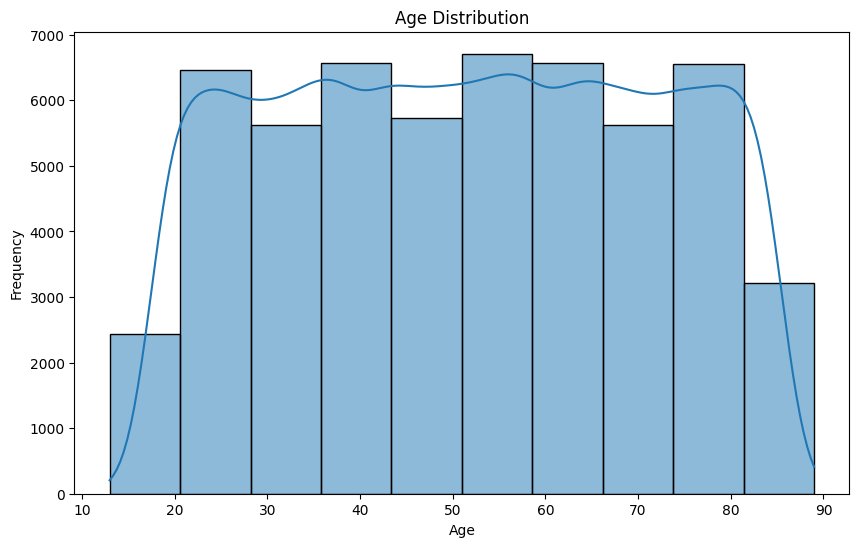

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [8]:
import numpy as np
# Bin the ages
bins = np.histogram_bin_edges(df['Age'], bins=10)
hist, bin_edges = np.histogram(df['Age'], bins=bins)

# Find the bin with the highest frequency
max_bin_index = np.argmax(hist)
age_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

print(f"The age range with the highest number of patients is: {age_range[0]:.1f} - {age_range[1]:.1f} years")

The age range with the highest number of patients is: 51.0 - 58.6 years


<h4 style="color: #FF5733">The age range with the highest number of patients is: 51.0 - 58.6 years</h4>

<h3>1a1... Age Distribution by Medical Condition</h3>

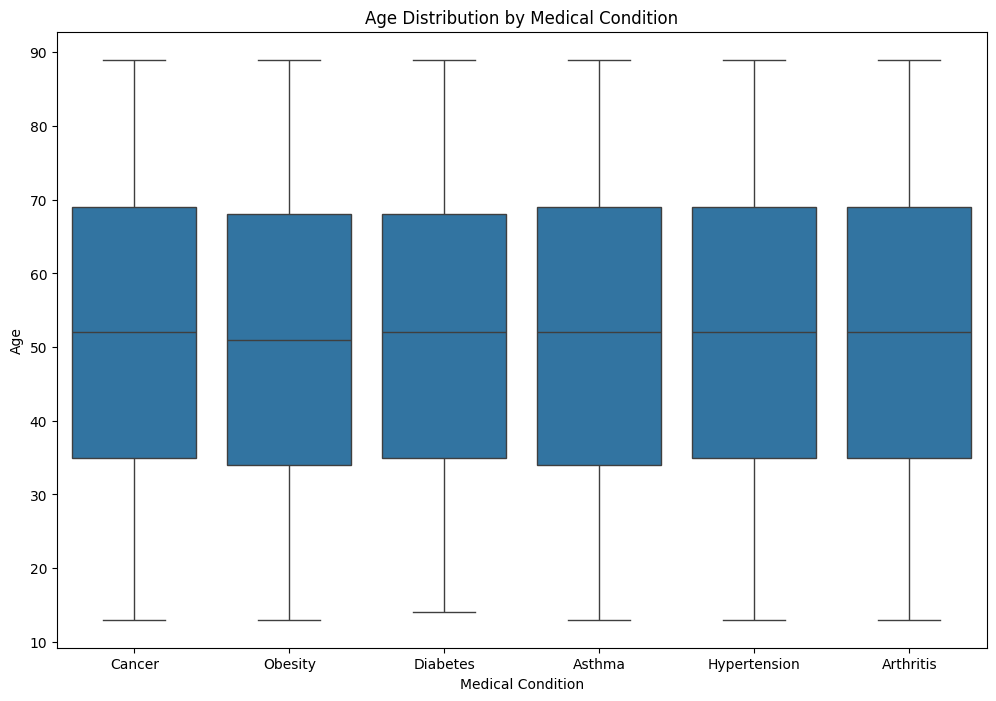

In [9]:
# Age distribution by medical condition
plt.figure(figsize=(12, 8))
sns.boxplot(x='Medical Condition', y='Age', data=df)
plt.title('Age Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.show()

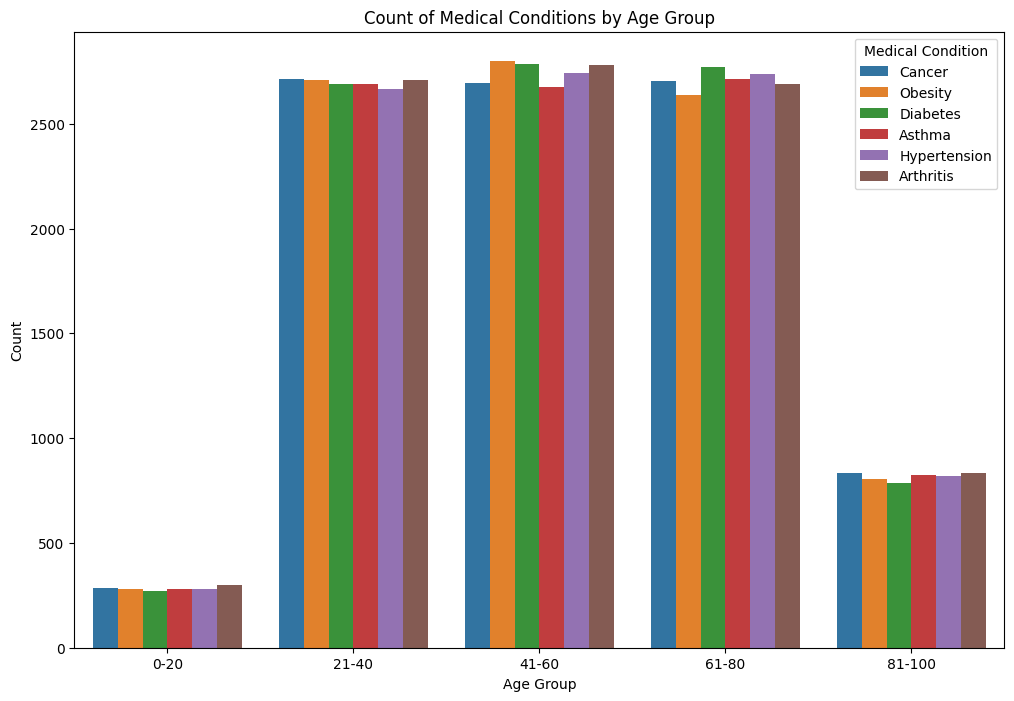

In [10]:
#  Plot Count of Medical conditions
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count plot of medical conditions by age group
plt.figure(figsize=(12, 8))
sns.countplot(x='Age Group', hue='Medical Condition', data=df)
plt.title('Count of Medical Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Medical Condition')
plt.show()

<h3>1b.... Age Distribution by Gender</h3>

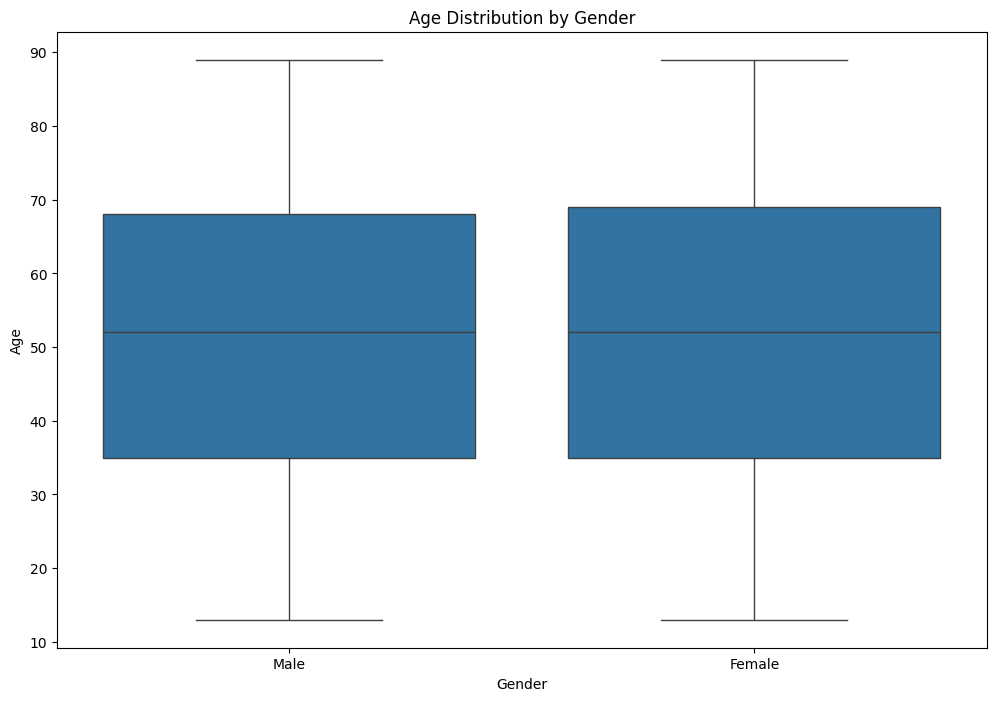

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

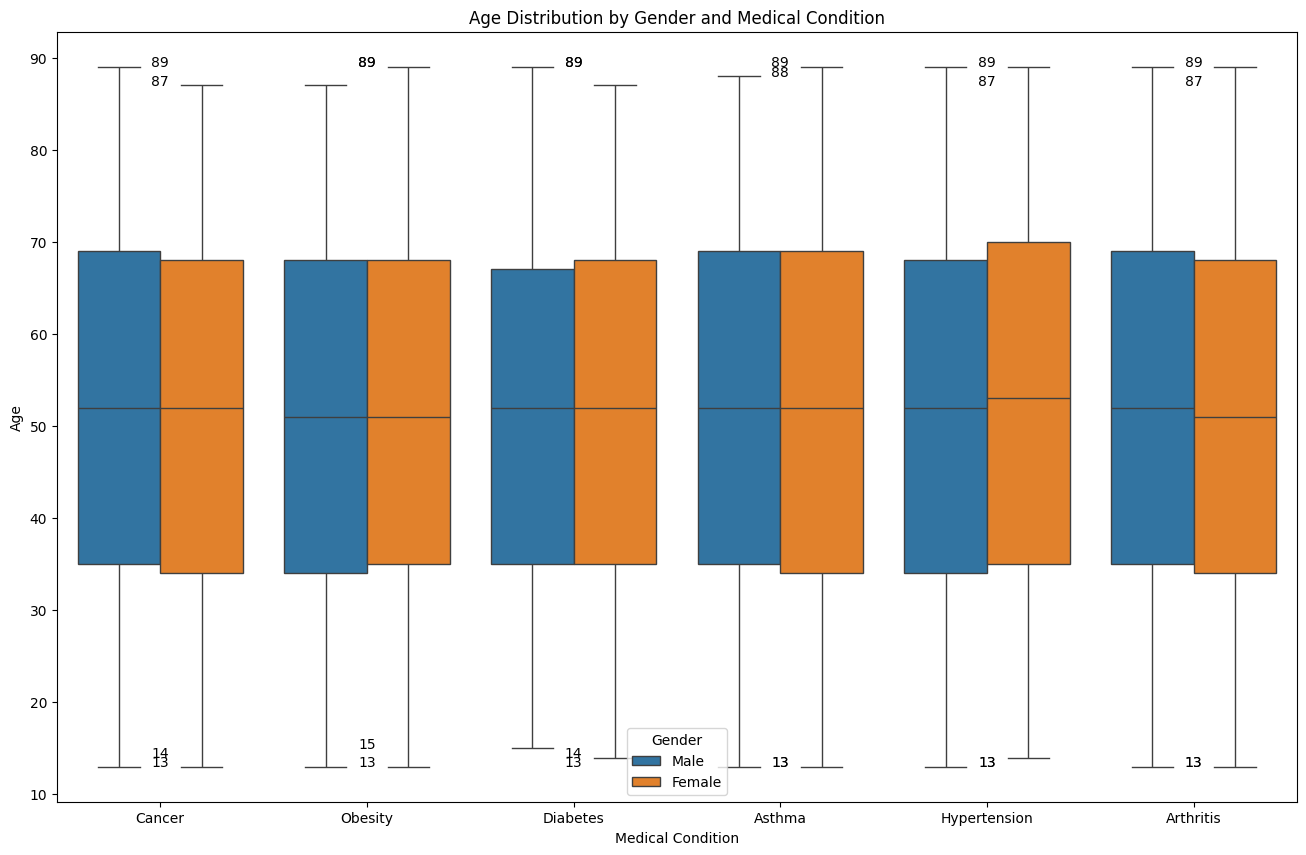

In [12]:
# Calculate the min and max ages for each medical condition and gender
age_stats = df.groupby(['Medical Condition', 'Gender'])['Age'].agg(['min', 'max']).reset_index()

# Plot the box plot
plt.figure(figsize=(16, 10))
sns.boxplot(x='Medical Condition', y='Age', hue='Gender', data=df)
plt.title('Age Distribution by Gender and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Age')
plt.legend(title='Gender')

# Annotate the plot with min and max ages
for i, row in age_stats.iterrows():
    plt.text(i % len(df['Medical Condition'].unique()), row['min'], f"{row['min']:.0f}", color='black', ha="center", fontsize=10)
    plt.text(i % len(df['Medical Condition'].unique()), row['max'], f"{row['max']:.0f}", color='black', ha="center", fontsize=10)

plt.show()

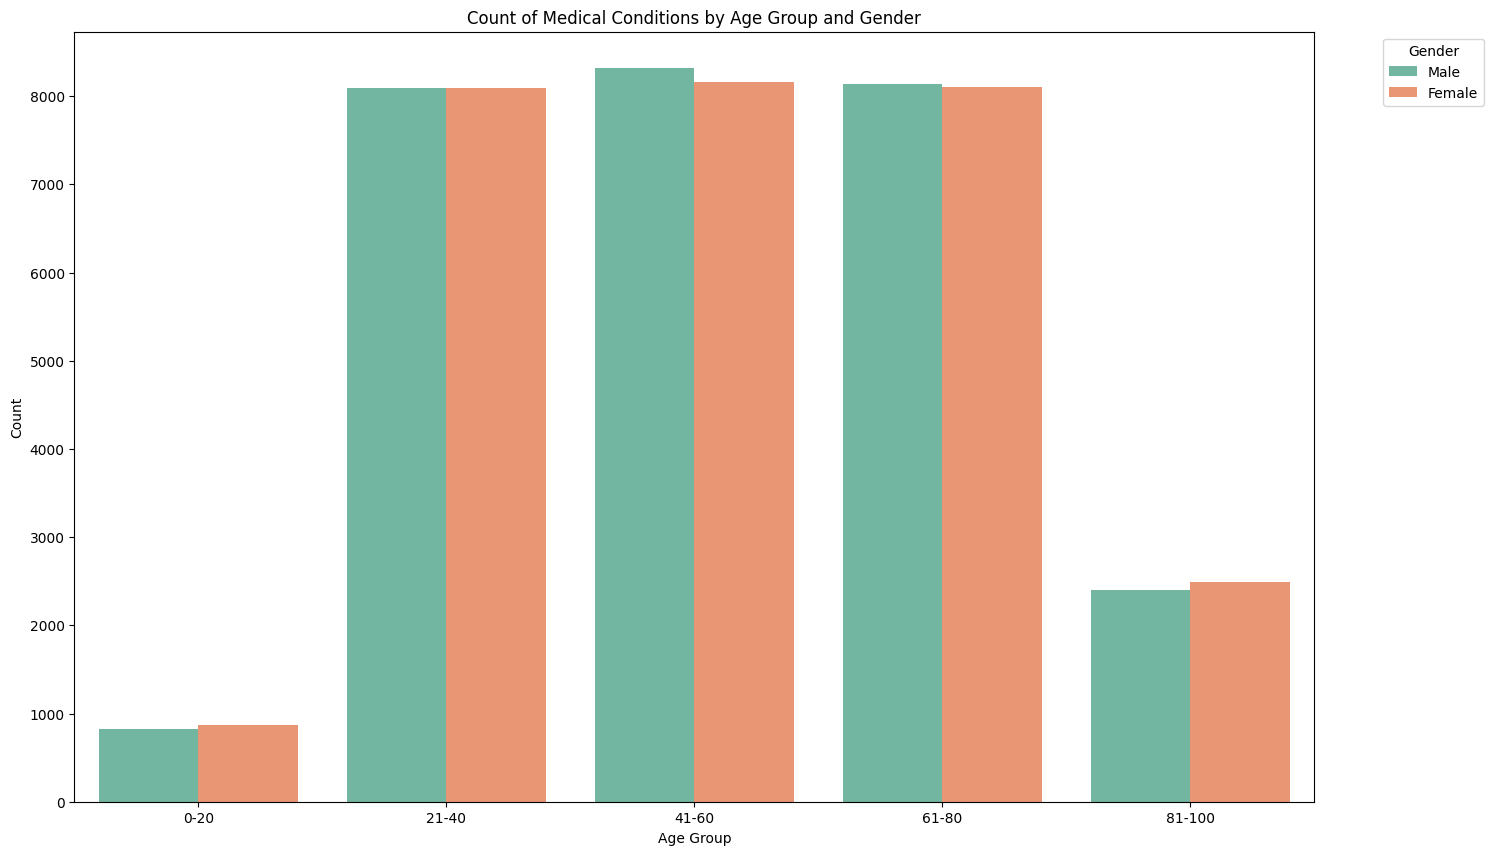

In [13]:
# Create age groups
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count plot of medical conditions by age group and gender
plt.figure(figsize=(16, 10))
sns.countplot(x='Age Group', hue='Gender', data=df, palette='Set2', dodge=True)
plt.title('Count of Medical Conditions by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h3>1c... Blood Type Analysis</h3>

C:\Users\ahmad\AppData\Local\Temp\ipykernel_4632\1247904600.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Blood Type', data=df, palette='Set2')


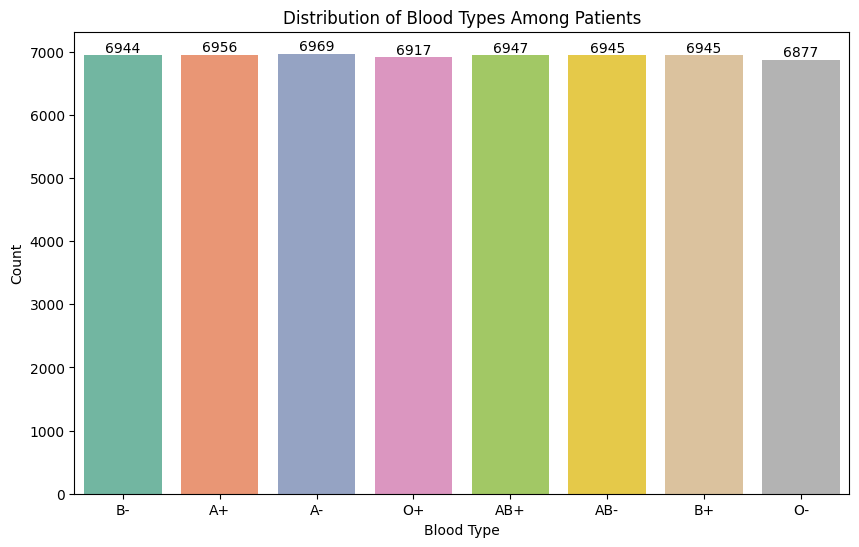

In [14]:
# Create the count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Blood Type', data=df, palette='Set2')

# Annotate the bars with their count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Blood Types Among Patients')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.show()

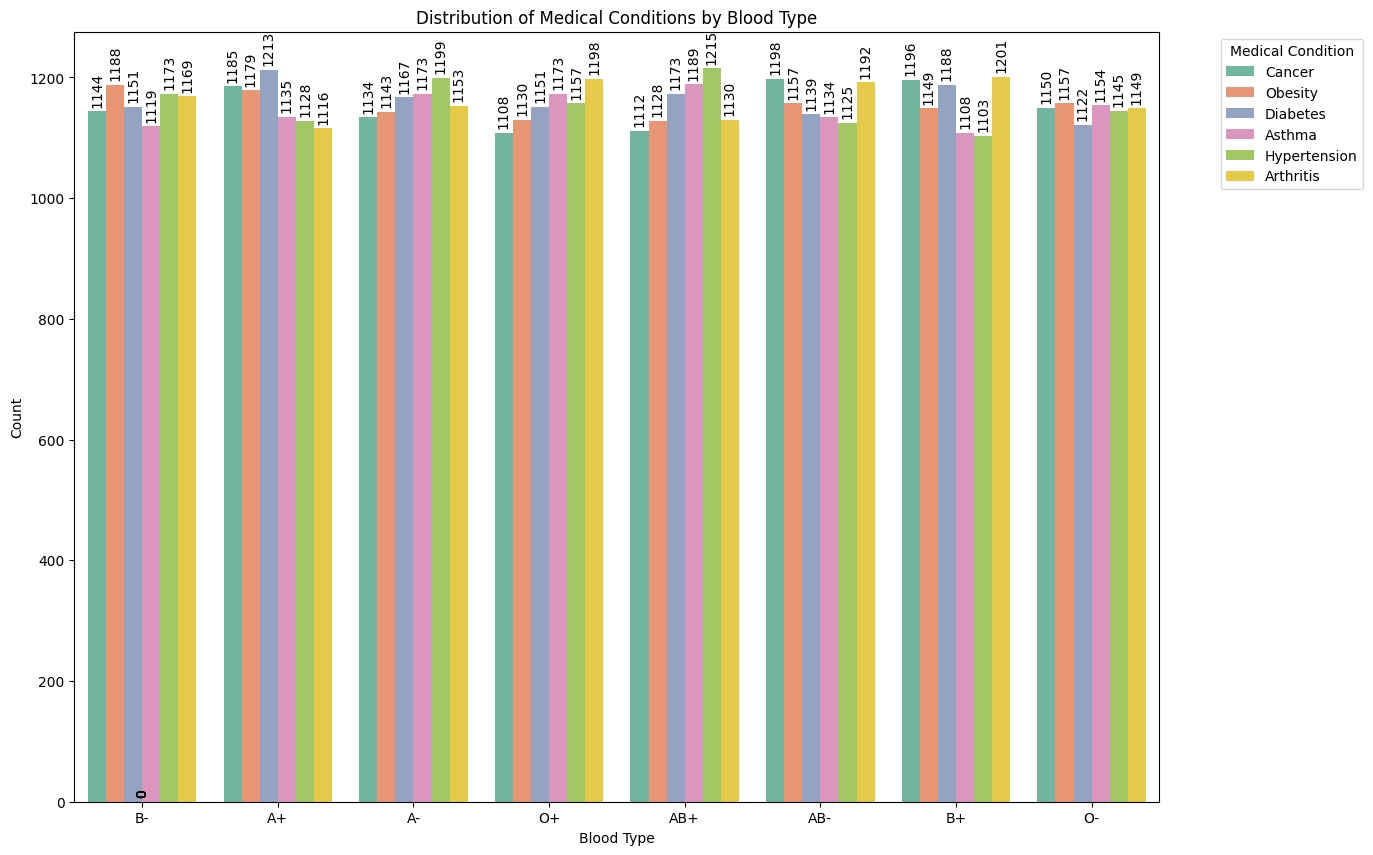

In [15]:
# Create the count plot
plt.figure(figsize=(14, 10))
ax = sns.countplot(x='Blood Type', hue='Medical Condition', data=df, palette='Set2', dodge=True)

# Annotate the bars with their count values
for p in ax.patches:
    height = p.get_height()
    # Add vertical annotations above the bars
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='bottom', 
                xytext=(0, 3), 
                textcoords='offset points',
                rotation=90)  # Rotate the text vertically

plt.title('Distribution of Medical Conditions by Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h3>1c1...Blood Type Distribution</h3>

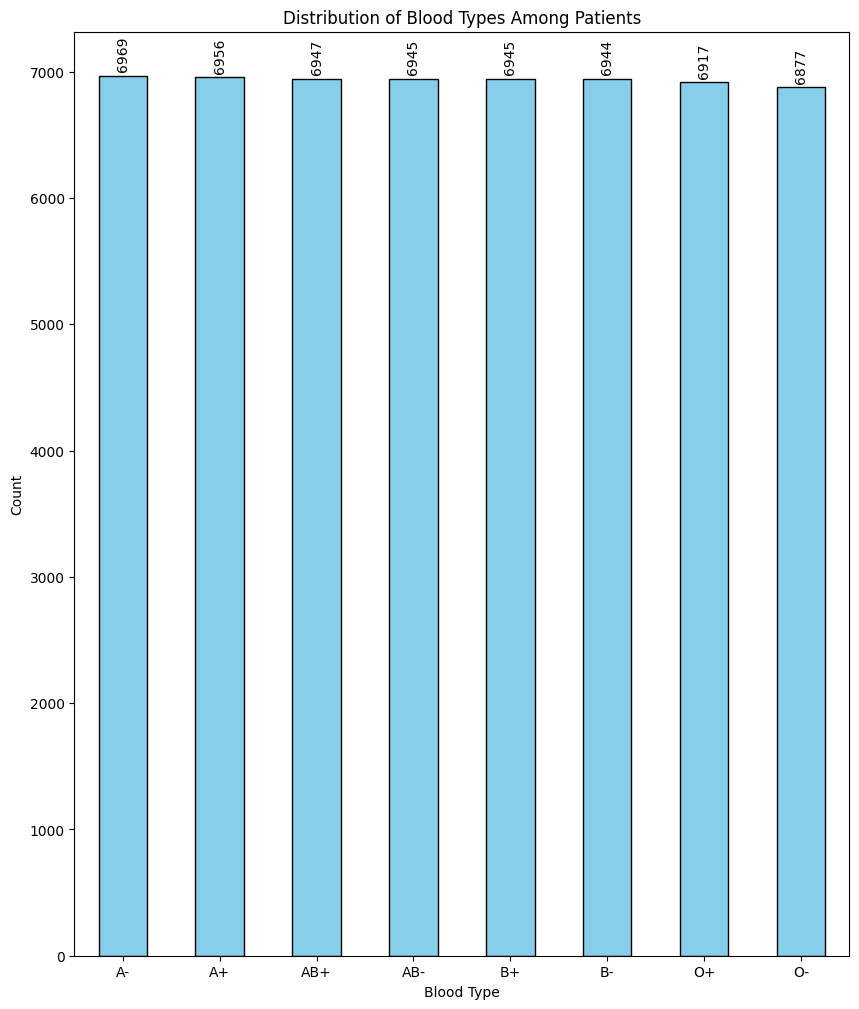

In [16]:
# Calculate summary statistics
blood_type_counts = df['Blood Type'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 12))
ax = blood_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Annotate the bars with their count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='bottom', 
                xytext=(0, 3), 
                textcoords='offset points',
                rotation=90)

plt.title('Distribution of Blood Types Among Patients')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
plt.show()

# Calculate and print summary statistics
# blood_type_percentages = blood_type_counts / blood_type_counts.sum() * 100
# print("Blood Type Counts:")
# print(blood_type_counts)
# print("\nBlood Type Percentages (%):")
# print(blood_type_percentages)

<p>
    <ul  style="color: green">
        <li>Blood Type     Percentage</li>
        <li>A- =     12.556757%</li>
        <li>A+ =     12.533333%</li>
        <li>AB+ =    12.517117%</li>
        <li>AB- =    12.513514%</li>
        <li>B+ =     12.513514%</li>
        <li>B- =     12.511712%</li>
        <li>O+ =     12.463063%</li>
        <li>O- =     12.390991%</li>
    </ul>
</p>

<h3>1c2... Medical Condition by blood types</h3>

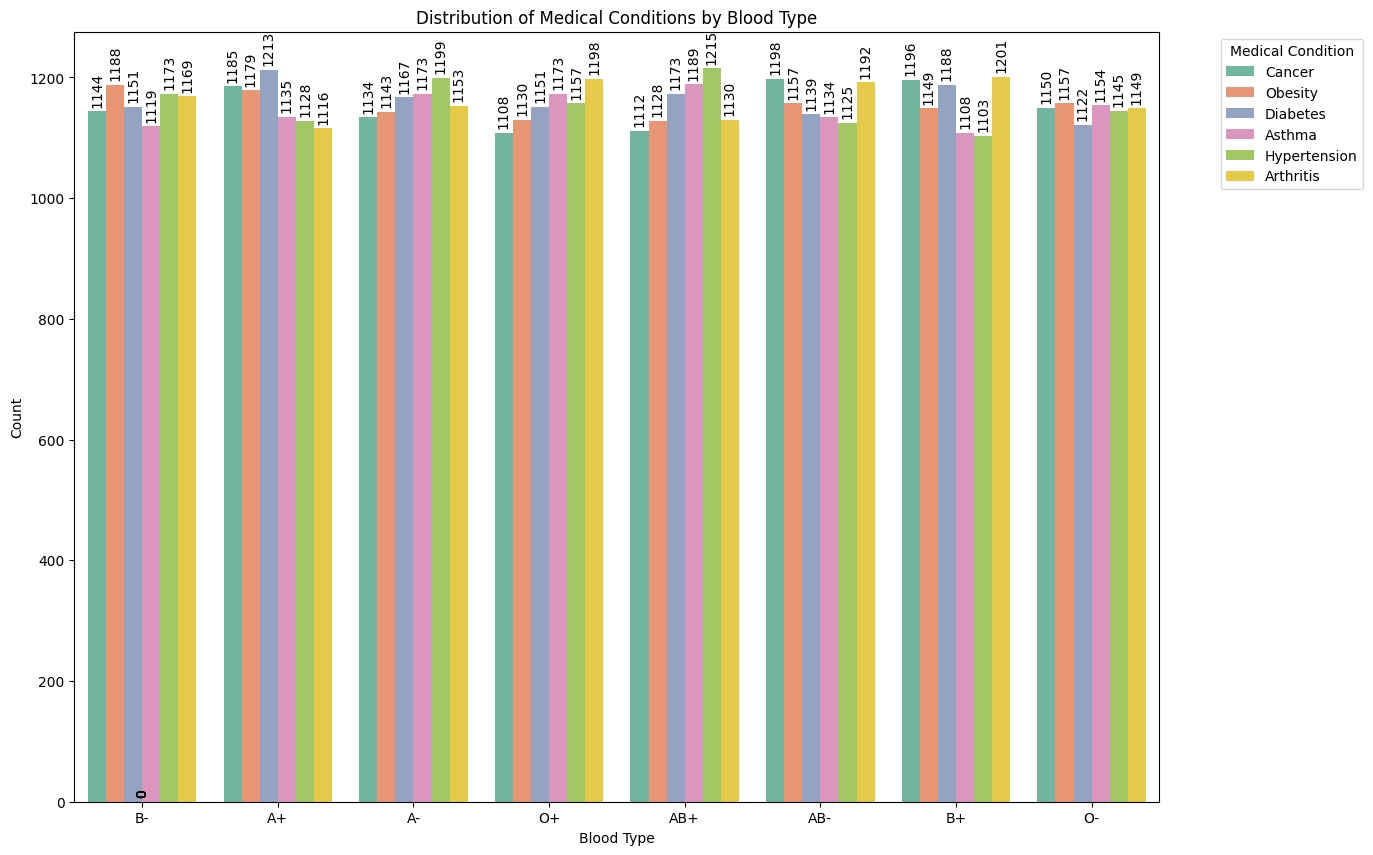

Medical Conditions by Blood Type (Counts):
Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                      1116    1135    1185      1213          1128     1179
A-                      1153    1173    1134      1167          1199     1143
AB+                     1130    1189    1112      1173          1215     1128
AB-                     1192    1134    1198      1139          1125     1157
B+                      1201    1108    1196      1188          1103     1149
B-                      1169    1119    1144      1151          1173     1188
O+                      1198    1173    1108      1151          1157     1130
O-                      1149    1154    1150      1122          1145     1157

Medical Conditions by Blood Type (Percentages):
Medical Condition  Arthritis     Asthma     Cancer   Diabetes  Hypertension  \
Blood Type                                       

In [17]:
# Distribution of medical conditions by blood type
plt.figure(figsize=(14, 10))
ax = sns.countplot(x='Blood Type', hue='Medical Condition', data=df, palette='Set2', dodge=True)

# Annotate the bars with their count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', 
                va='bottom', 
                xytext=(0, 3), 
                textcoords='offset points',
                rotation=90)

plt.title('Distribution of Medical Conditions by Blood Type')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Calculate summary statistics
condition_by_blood_type = df.groupby(['Blood Type', 'Medical Condition']).size().unstack(fill_value=0)
condition_by_blood_type_percentages = condition_by_blood_type.div(condition_by_blood_type.sum(axis=1), axis=0) * 100

print("Medical Conditions by Blood Type (Counts):")
print(condition_by_blood_type)
print("\nMedical Conditions by Blood Type (Percentages):")
print(condition_by_blood_type_percentages)

In [18]:
# Identify the blood type with the highest count for each medical condition
max_counts = condition_by_blood_type.idxmax()
print("\nBlood Type with the Highest Count for Each Medical Condition:")
for condition in condition_by_blood_type.columns:
    max_blood_type = max_counts[condition]
    max_count = condition_by_blood_type.loc[max_blood_type, condition]
    print(f'{condition}: {max_blood_type} with {max_count} patients')


Blood Type with the Highest Count for Each Medical Condition:
Arthritis: B+ with 1201 patients
Asthma: AB+ with 1189 patients
Cancer: AB- with 1198 patients
Diabetes: A+ with 1213 patients
Hypertension: AB+ with 1215 patients
Obesity: B- with 1188 patients


<h1>2... Hospital and Doctor Performance</h1>

<h3>2a... Doctors Performance Analysis</h3>